In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
%matplotlib inline

# Support Vector Machines

### Dataset 1

In [20]:
data1=scipy.io.loadmat('data/ex6data1.mat')
X=data1['X']
y=data1['y']

In [28]:
def plot_data(X,y):
    
    pos = np.array([X[i] for i in xrange(X.shape[0]) if y[i] == 1])
    neg = np.array([X[i] for i in xrange(X.shape[0]) if y[i] == 0])
    
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0],pos[:,1], 'r+', ms=8, mew=2, label="Positive samples")
    plt.plot(neg[:,0],neg[:,1], 'yo', ms=8, mec='k', label="Negative samples")
    plt.legend()
    plt.xlabel("Feture 1")
    plt.ylabel("Feture 2")
    plt.grid()
    
def plot_boundary(model, X, contour = True):
    
    xmin, xmax = X[:,0].min(), X[:,0].max()
    ymin, ymax = X[:,1].min(), X[:,1].max()

    xpadding = (xmax-xmin) * 0.1
    ypadding = (ymax-ymin) * 0.1 

    xmin, xmax = xmin - xpadding, xmax + xpadding
    ymin, ymax = ymin - ypadding, ymax + ypadding
    
    xx,yy = np.meshgrid( np.arange(xmin,xmax,0.02),
                        np.arange(ymin,ymax,0.02))

    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.pcolormesh(xx,yy,Z>0, cmap=plt.cm.Dark2)

    if contour:
        plt.contour(xx, yy, Z, colors=['k', 'k', 'k'],
                    linestyles=['--', '-', '--'], 
                    levels=[-0.5, 0, 0.5])
    else:
        plt.contour(xx, yy, Z, colors='k',
                    linestyles='-',
                    levels=0)
        
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

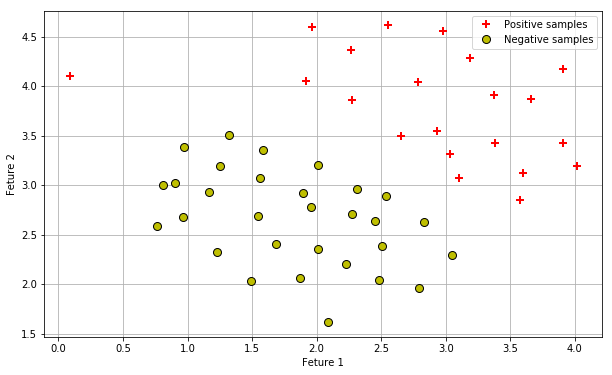

In [22]:
plot_data(X,y)

Text(0.5,1,u'SVM with C = 1.')

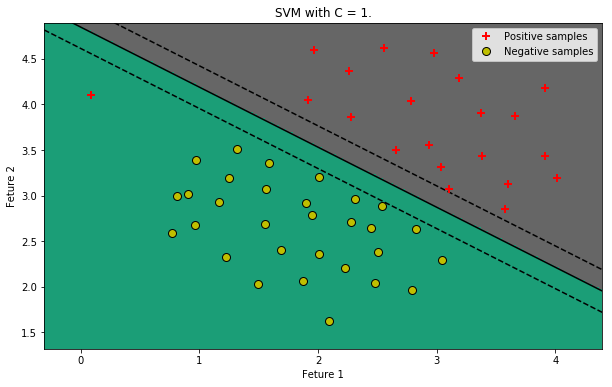

In [29]:
from sklearn import svm

svc_10 = svm.SVC(C=1., kernel='linear', verbose=False)
svc_10.fit(X, y.flatten())
plot_data(X,y)
plot_boundary(svc_10,X)
plt.title("SVM with C = 1.")

Text(0.5,1,u'SVM with C = 100.')

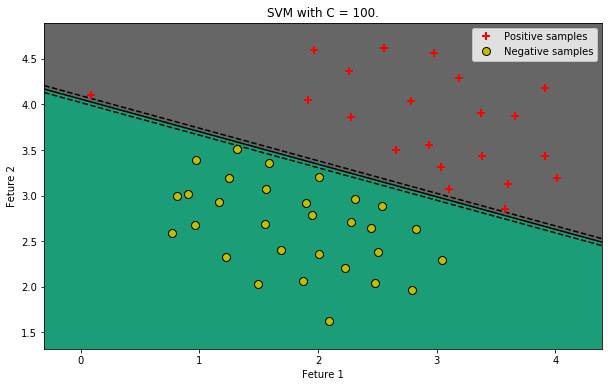

In [30]:
svc_100 = svm.SVC(C=100., kernel='linear', verbose=False)
svc_100.fit(X, y.flatten())
plot_data(X,y)
plot_boundary(svc_100,X)
plt.title("SVM with C = 100.")

### SVM with gaussian kernel

In [31]:
def gaussian_kernel(x1,x2,sigma=1.):
    return np.exp( - np.dot((x1-x2).T,x1-x2) / 2* sigma*sigma )

In [32]:
gaussian_kernel(X[0],X[1])

0.72629600998750155

### Dataset 2

In [33]:
data2=scipy.io.loadmat('data/ex6data2.mat')
X=data2['X']
y=data2['y']

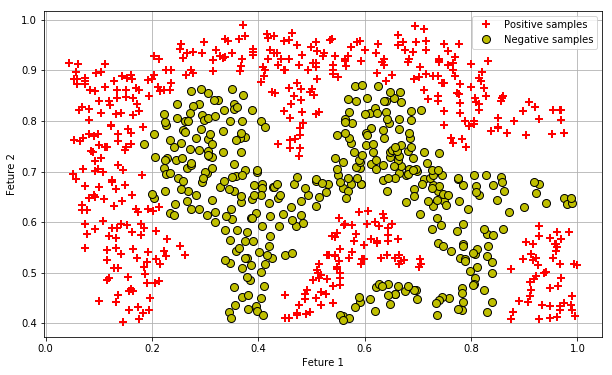

In [34]:
plot_data(X,y)

Text(0.5,1,u'SVM with C = 1., gamma=5000.00')

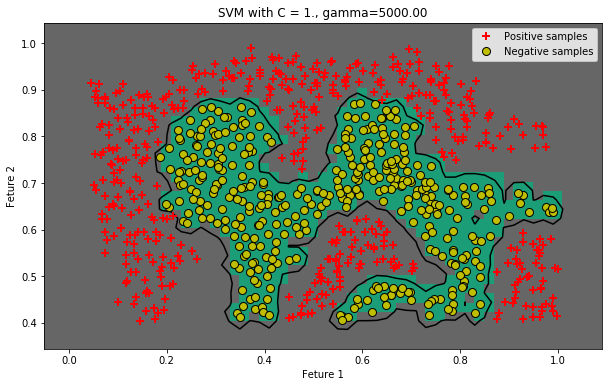

In [37]:
sigma=0.01
gamma=1/(2*sigma*sigma)
svc = svm.SVC(C=1., kernel='rbf', gamma=gamma, verbose=False)
svc.fit(X, y.flatten())
plot_data(X,y)
plot_boundary(svc,X, contour=False)
plt.title("SVM with C = 1., gamma=%.2f" % gamma)

### Dataset 3

In [42]:
data3=scipy.io.loadmat('data/ex6data3.mat')
X,y = data3['X'], data3['y']
Xval, yval = data3['Xval'], data3['yval']

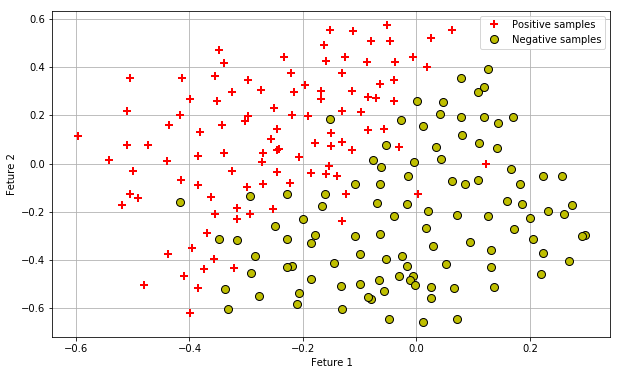

In [43]:
plot_data(X,y)

In [55]:
from itertools import combinations
val=(0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)

best_score=0.
best_val = (0,0)

for c,s in combinations(val,2):
    
    svc = svm.SVC(C=c, kernel='rbf', gamma=1./(2.*s*s), verbose=False)
    svc.fit(X, y.flatten())
    score = svc.score(Xval,yval)
    
    if score > best_score:
        best_score = score
        best_val=(c,s)
        
print "Best score %.2f with (C, Sigma) = (%.2f, %.2f)" % (best_score, best_val[0], best_val[1])        

Best score 0.91 with (C, Sigma) = (0.10, 0.30)


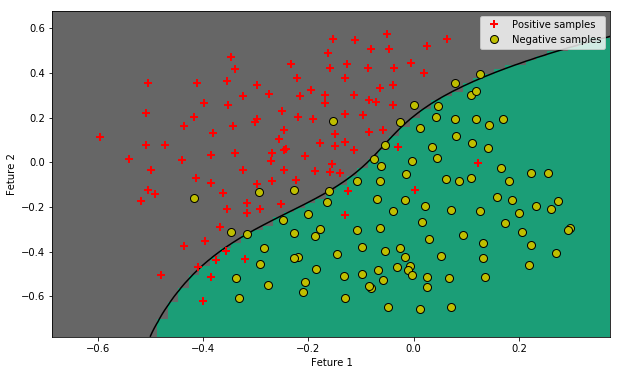

In [58]:
svc = svm.SVC(C=0.10, kernel='rbf', gamma= np.power(0.30,-2), verbose=False)
svc.fit(X, y.flatten())
plot_data(X,y)
plot_boundary(svc,X, contour=False)